In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

import sys, os, time, warnings, pdb, pickle, random, math, re, json
warnings.filterwarnings('ignore')
sys.path.insert(0, '../scripts')

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)
sns.set_style("darkgrid")
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [4]:
# Display basic statistics of numerical features
print("\nBasic statistics of numerical features:")
print(df.describe())


Basic statistics of numerical features:
            step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 6362620.00  6362620.00     6362620.00      6362620.00      6362620.00   
mean      243.40   179861.90      833883.10       855113.67      1100701.67   
std       142.33   603858.23     2888242.67      2924048.50      3399180.11   
min         1.00        0.00           0.00            0.00            0.00   
25%       156.00    13389.57           0.00            0.00            0.00   
50%       239.00    74871.94       14208.00            0.00       132705.66   
75%       335.00   208721.48      107315.18       144258.41       943036.71   
max       743.00 92445516.64    59585040.37     49585040.37    356015889.35   

       newbalanceDest    isFraud  isFlaggedFraud  
count      6362620.00 6362620.00      6362620.00  
mean       1224996.40       0.00            0.00  
std        3674128.94       0.04            0.00  
min              0.00       0.00           

In [5]:
# Display value counts for categorical features
print("\nValue counts for 'type':")
print(df['type'].value_counts())
print("\nValue counts for 'isFraud':")
print(df['isFraud'].value_counts())
print("\nValue counts for 'isFlaggedFraud':")
print(df['isFlaggedFraud'].value_counts())


Value counts for 'type':
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Value counts for 'isFraud':
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Value counts for 'isFlaggedFraud':
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [6]:
# Analyze fraud distribution across transaction types
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print("\nFraud rate by transaction type:")
print(fraud_by_type)


Fraud rate by transaction type:
type
TRANSFER   0.01
CASH_OUT   0.00
CASH_IN    0.00
DEBIT      0.00
PAYMENT    0.00
Name: isFraud, dtype: float64


In [7]:
# Analyze transaction amounts
print("\nTransaction amount statistics by type:")
print(df.groupby('type')['amount'].describe())


Transaction amount statistics by type:
              count      mean        std  min       25%       50%       75%  \
type                                                                          
CASH_IN  1399284.00 168920.24  126508.26 0.04  70510.18 143427.71 239899.09   
CASH_OUT 2237500.00 176273.96  175329.74 0.00  72669.65 147072.18 246539.48   
DEBIT      41432.00   5483.67   13318.54 0.55   1500.18   3048.99   5479.18   
PAYMENT  2151495.00  13057.60   12556.45 0.02   4383.82   9482.19  17561.22   
TRANSFER  532909.00 910647.01 1879573.53 2.60 215905.35 486308.39 974958.00   

                 max  
type                  
CASH_IN   1915267.90  
CASH_OUT 10000000.00  
DEBIT      569077.51  
PAYMENT    238637.98  
TRANSFER 92445516.64  


In [8]:
# Analyze transaction amounts for fraudulent vs non-fraudulent transactions
print("\nTransaction amount statistics for fraudulent vs non-fraudulent:")
print(df.groupby('isFraud')['amount'].describe())


Transaction amount statistics for fraudulent vs non-fraudulent:
             count       mean        std  min       25%       50%        75%  \
isFraud                                                                        
0       6354407.00  178197.04  596236.98 0.01  13368.40  74684.72  208364.76   
1          8213.00 1467967.30 2404252.95 0.00 127091.33 441423.44 1517771.48   

                max  
isFraud              
0       92445516.64  
1       10000000.00  


In [9]:
# Analyze balance changes
df['balanceChange'] = df['newbalanceOrig'] - df['oldbalanceOrg']
print("\nBalance change statistics:")
print(df['balanceChange'].describe())


Balance change statistics:
count     6362620.00
mean        21230.56
std        146643.29
min     -10000000.00
25%        -10150.44
50%             0.00
75%             0.00
max       1915267.90
Name: balanceChange, dtype: float64


In [10]:
# Analyze patterns in fraudulent transactions
fraud_df = df[df['isFraud'] == 1]
print("\nPatterns in fraudulent transactions:")
print(fraud_df['type'].value_counts())
print("\nAmount statistics for fraudulent transactions:")
print(fraud_df['amount'].describe())


Patterns in fraudulent transactions:
type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Amount statistics for fraudulent transactions:
count       8213.00
mean     1467967.30
std      2404252.95
min            0.00
25%       127091.33
50%       441423.44
75%      1517771.48
max     10000000.00
Name: amount, dtype: float64


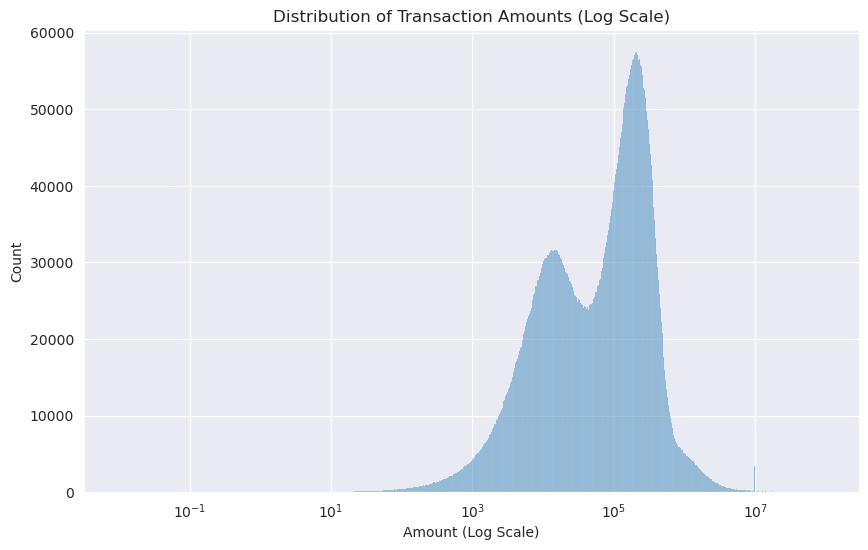

In [11]:
# Plot distribution of transaction amounts (log scale)
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, log_scale=True)
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Count')
plt.savefig('amount_distribution.png')

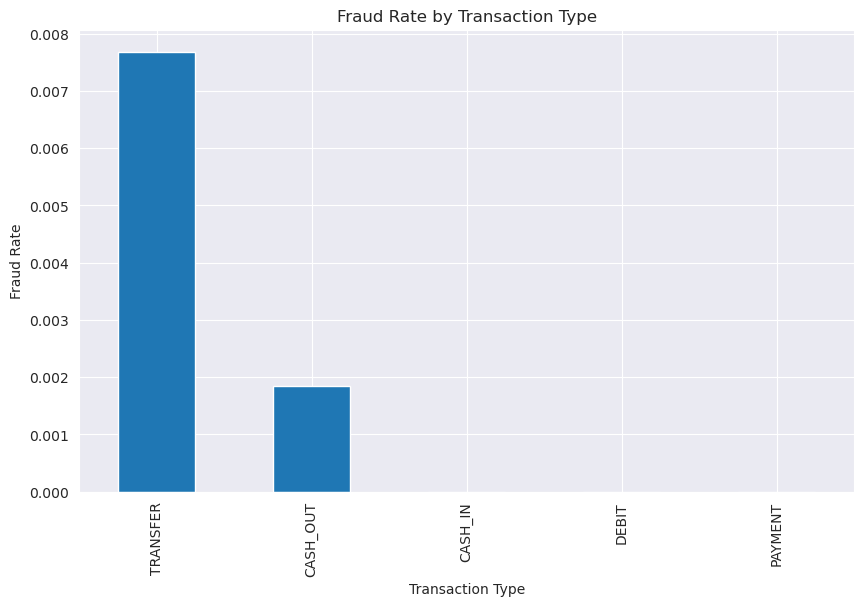

In [12]:
# Plot fraud rate by transaction type
plt.figure(figsize=(10, 6))
fraud_by_type.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.savefig('fraud_rate_by_type.png')

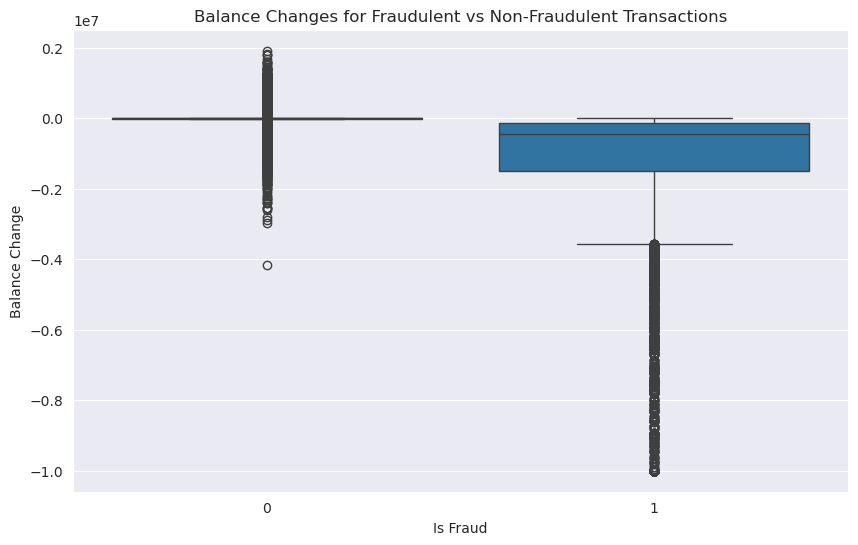

In [13]:
# Plot balance changes for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='balanceChange', data=df)
plt.title('Balance Changes for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.savefig('balance_change_fraud.png')

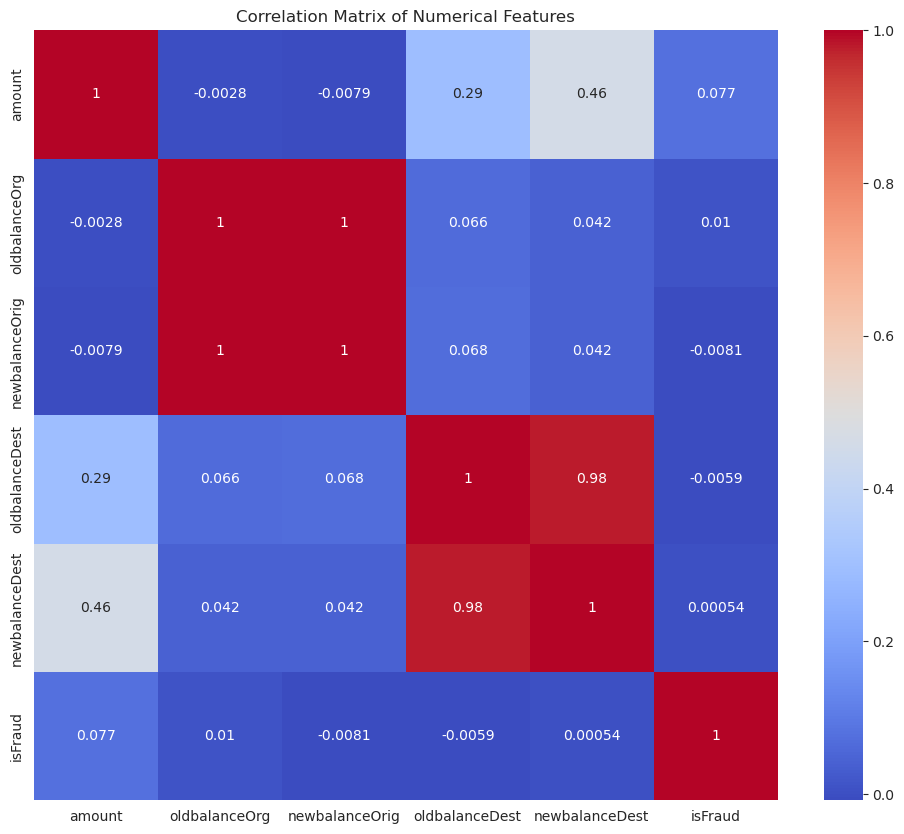

In [14]:
# Correlation matrix of numerical features
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')

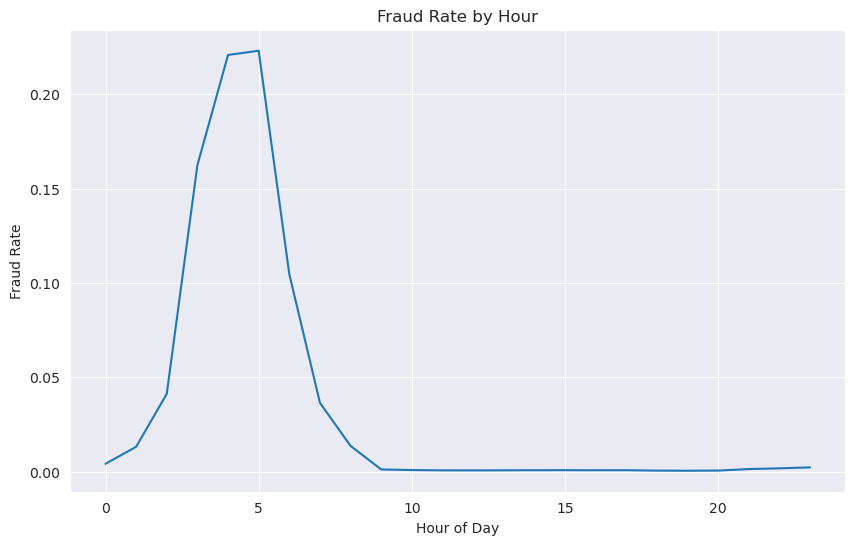

In [15]:
# Time series analysis of fraud
df['hour'] = df['step'] % 24
fraud_by_hour = df.groupby('hour')['isFraud'].mean()
plt.figure(figsize=(10, 6))
fraud_by_hour.plot()
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.savefig('fraud_rate_by_hour.png')

In [ ]:
class CountMinSketch:
  def __init__(self, width, depth):
    self.width = width
    self.depth = depth
    self.sketch = np.zeros((depth, width), dtype=int)
    self.hash_functions = [
      lambda x, i=i: hash(str(x) + str(i)) % self.width
      for i in range(self.depth)
    ]

  def update(self, item, count=1):
    for i, hash_func in enumerate(self.hash_functions):
      j = hash_func(item)
      self.sketch[i, j] += count

  def estimate(self, item):
    return min(self.sketch[i, hash_func(item)] 
               for i, hash_func in enumerate(self.hash_functions))

In [ ]:
# Initialize sketches for each feature
sketches = {feature: CountMinSketch(width=1000, depth=5) for feature in features_to_sketch}

# Update sketches with the data
for feature in features_to_sketch:
  for value in df[feature]:
    sketches[feature].update(value)

# Function to test the sketch
def test_sketch(feature, value):
  estimated_count = sketches[feature].estimate(value)
  actual_count = (df[feature] == value).sum()
  print(f"Feature: {feature}, Value: {value}")
  print(f"Estimated count: {estimated_count}")
  print(f"Actual count: {actual_count}")
  print()

# Test the sketch with a few values
for feature in features_to_sketch:
  test_value = df[feature].median()
  test_sketch(feature, test_value)